### Task I: Quantum Computing

#### 1. Implement a simple quantum operation with Cirq or Pennylane
- **a)** With 5 qubits
- **b)** Apply Hadamard operation on every qubit 
- **c)** Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) 
- **d)** SWAP (0, 4) 
- **e)** Rotate X with $ \frac{\pi}{2} $ on any qubit 
- **f)** Plot the circuit 

In [1]:
import cirq
import numpy as np

circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(5)

# a) Apply Hadamard operation on every qubit
for qubit in qubits:
    circuit.append((cirq.H(qubit)))

# b) Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
for qubit in qubits[:-1]:
    circuit.append(cirq.CNOT(qubit , qubit+1))

# c) SWAP (0, 4)
circuit.append(cirq.SWAP(qubits[0], qubits[4])) 

# e) Rotate X with pi/2 on qubit 4
circuit.append(cirq.rx(np.pi/2).on(qubits[4]))

# f) Plot the circuit 
print(circuit)

0: ───H───@───────────────×──────────────
          │               │
1: ───H───X───@───────────┼──────────────
              │           │
2: ───H───────X───@───────┼──────────────
                  │       │
3: ───H───────────X───@───┼──────────────
                      │   │
4: ───H───────────────X───×───Rx(0.5π)───


#### 2. Implement a second circuit with a framework of your choice:
- **a)** Apply a Hadamard gate to the first qubit
- **b)** Rotate the second qubit by $ \frac{\pi}{3} $ around X
- **c)** Apply Hadamard gate to the third and fourth qubit
- **d)** Perform a swap test between the states of the first and second qubit $ |q1 q2\rangle $ and the third and fourth qubit $ |q3 q4\rangle $

In [27]:
import cirq
import numpy as np

circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(4)
ancilla = cirq.LineQubit(4)

# a) Apply a Hadamard gate to the first qubit
circuit.append(cirq.H(qubits[0]))

# b) Rotate the second qubit by pi/3 around X
circuit.append(cirq.rx(np.pi/3)(qubits[1]))

# c) Apply Hadamard gate to the third and fourth qubit
circuit.append(cirq.H(qubits[2]))
circuit.append(cirq.H(qubits[3]))

# d) Perform a swap test between the states of the first and second qubit and the third and fourth qubit
circuit.append(cirq.H(ancilla))
circuit.append(cirq.CSWAP(ancilla, qubits[0], qubits[1]))
circuit.append(cirq.CSWAP(ancilla, qubits[2], qubits[3]))
circuit.append(cirq.H(ancilla))

circuit.append(cirq.measure(ancilla))       

print(circuit)

sim = cirq.Simulator()
results = sim.run(circuit, repetitions=100_000).data
result_value_counts = results.iloc[:, 0].value_counts(normalize=True)

print("Swap Test Result:")
for key, value in result_value_counts.items():
    print(f"Pr(ancilla = {key}) = {value:.5f}")

0: ───H────────────×───────────────
                   │
1: ───Rx(0.333π)───×───────────────
                   │
2: ───H────────────┼───×───────────
                   │   │
3: ───H────────────┼───×───────────
                   │   │
4: ───H────────────@───@───H───M───
Swap Test Result:
Pr(ancilla = 0) = 0.74791
Pr(ancilla = 1) = 0.25209


This is a well-defined quantum computing operation so we will try deriving a mathematical solution. 

Let the states of the four qubits be $q_0, q_1, q_2, q_3$. Ater applying $H$ gates to the first, third, and fourth qubit as well as rotating the second qubit by $\theta = \pi/3$ with $R_x$ in the first three steps, their states are given as:

$$
\begin{align*}
|q_0\rangle = |q_2\rangle = |q_3\rangle &= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
|q_1\rangle &= \cos\left(\frac{\theta}{2}\right)|0\rangle - i\sin\left(\frac{\theta}{2}\right)|1\rangle
\end{align*}
$$

In the fourth step, performing a swap test involves applying a Hadamard gate to an ancilla qubit, conditionally swapping the states based on the ancilla, and applying another Hadamard to the ancilla. The probability of measuring the ancilla qubit in $|0\rangle$ after the swap test is given by:

$$
P(0) = \frac{1}{2} + \frac{1}{2}|\langle q_1, q_2 | q_3, q_4 \rangle|^2
$$

To find the value of $|\langle q_3, q_2 | q_1, q_0 \rangle|^2$, we need to calculate the overlap between the states $|q_3, q_2\rangle$ and $|q_1, q_0\rangle$, and then square the magnitude of this overlap. 
Given $|q_2\rangle = |q_3\rangle$, the combined state $|q_3, q_2\rangle$ can be written as:

$$
\begin{aligned}
|q_3, q_2\rangle &= \left(\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\right) \otimes \left(\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\right) \\
&= \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)
\end{aligned}
$$


And the state $|q_1, q_0\rangle$ is:

$$
\begin{aligned}
|q_1, q_0\rangle &= \left(\cos\left(\frac{\theta}{2}\right)|0\rangle - i\sin\left(\frac{\theta}{2}\right)|1\rangle\right) \otimes \left(\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\right) \\
&= \cos\left(\frac{\theta}{2}\right)\frac{1}{\sqrt{2}}(|00\rangle + |01\rangle) - i\sin\left(\frac{\theta}{2}\right)\frac{1}{\sqrt{2}}(|10\rangle + |11\rangle)
\end{aligned}
$$

The overlap $\langle q_3, q_2 | q_1, q_0 \rangle$ can be found by taking the inner product of $|q_3, q_2\rangle$ with $|q_1, q_0\rangle$:

$$
\langle q_3, q_2 | q_1, q_0 \rangle = \frac{\cos\left(\frac{\theta}{2}\right) - i\sin\left(\frac{\theta}{2}\right)}{\sqrt{2}} 
= \frac{e^{-i\frac{\theta}{2}}}{\sqrt{2}}
$$

The squared magnitude of this overlap is:

$$
|\langle q_3, q_2 | q_1, q_0 \rangle|^2 = \left|\frac{e^{-i\frac{\theta}{2}}}{\sqrt{2}}\right|^2 = \frac{1}{2}
$$

Thus, the probability of ancilla qubit being in $|0\rangle$ is: 

$$ 
P(ancilla = 0) = \frac{1}{2} + \frac{1}{2}\left(\frac{1}{2}\right) = \frac{1}{2} + \frac{1}{4} = \frac{3}{4} 
$$

We observe that the result is independent of $\theta$. Let's also confirm that in the simulation. 

0: ───H───────────×───────────────
                  │
1: ───Rx(theta)───×───────────────
                  │
2: ───H───────────┼───×───────────
                  │   │
3: ───H───────────┼───×───────────
                  │   │
4: ───H───────────@───@───H───M───


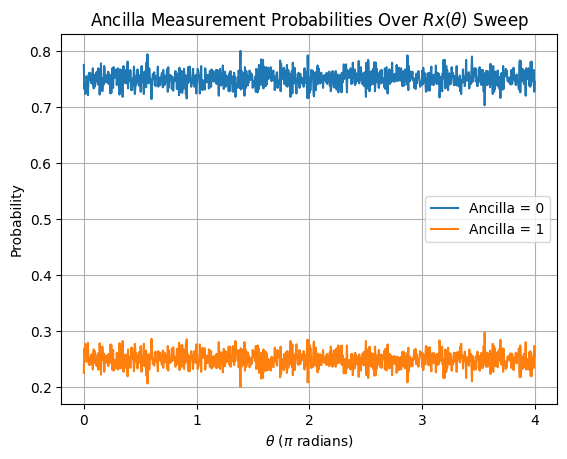

In [30]:
import cirq
import sympy
import numpy as np
import matplotlib.pyplot as plt

circuit = cirq.Circuit()
qubits  = cirq.LineQubit.range(4)
ancilla = cirq.LineQubit(4)

theta = sympy.Symbol("theta")

# a) Apply a Hadamard gate to the first qubit
circuit.append(cirq.H(qubits[0]))

# b) Rotate the second qubit by pi/3 around X
circuit.append(cirq.rx(theta)(qubits[1]))

# c) Apply Hadamard gate to the third and fourth qubit
circuit.append(cirq.H(qubits[2]))
circuit.append(cirq.H(qubits[3]))

# d) Perform a swap test between the states of the first and second qubit and the third and fourth qubit
circuit.append(cirq.H(ancilla))
circuit.append(cirq.CSWAP(ancilla, qubits[0], qubits[1]))
circuit.append(cirq.CSWAP(ancilla, qubits[2], qubits[3]))
circuit.append(cirq.H(ancilla))

circuit.append(cirq.measure(ancilla))

print(circuit)

sim = cirq.Simulator()

thetas = cirq.Linspace(key="theta", start=0, stop=4*np.pi, length=1000)
thetq_values = np.linspace(0, 4*np.pi, 1000)

results_sweep = sim.run_sweep(circuit, repetitions=1_000, params=thetas)
results_0 = []
results_1 = []
for results in results_sweep:
    counts = results.data.iloc[:, 0].value_counts(normalize=True)
    results_0.append(counts.get(0, 0))
    results_1.append(counts.get(1, 0))

plt.plot(thetq_values / np.pi, results_0, label="Ancilla = 0")
plt.plot(thetq_values / np.pi, results_1, label="Ancilla = 1")
plt.xlabel("$\\theta$ ($\\pi$ radians)")
plt.ylabel("Probability")
plt.xticks(range(5), [f"{x}" for x in range(5)])
plt.legend()
plt.title("Ancilla Measurement Probabilities Over $Rx$($\\theta$) Sweep")
plt.grid(True)
plt.show()

Let's also briefly think about $R_y$ or $R_z$ rotations on $q_1$:

$$
\begin{aligned}
R_z(\theta)|0\rangle &= e^{-i\frac{\theta}{2}}|0\rangle \\ 
R_y(\theta)|0\rangle &= \cos\left(\frac{\theta}{2}\right)|0\rangle + \sin\left(\frac{\theta}{2}\right)|1\rangle
\end{aligned}
$$

We see that the $R_z$ would have the same result as $R_x$ with $\langle q_3, q_2 | q_1, q_0 \rangle$ having a constant norm across $\theta$. On the other hand, effect of $R_y$ would be different such that: 

$$
\langle q_3, q_2 | q_1, q_0 \rangle = \frac{\cos\left(\frac{\theta}{2}\right) + \sin\left(\frac{\theta}{2}\right)}{\sqrt{2}} 
$$

$$
\begin{aligned}
P(ancilla = 0) &= \frac{1}{2} + \frac{1}{2}\frac{\left(\cos\left(\frac{\theta}{2}\right) + \sin\left(\frac{\theta}{2}\right)\right)^2}{2}
&= \frac{3}{4} + \frac{\sin \theta} {4}
\end{aligned}
$$

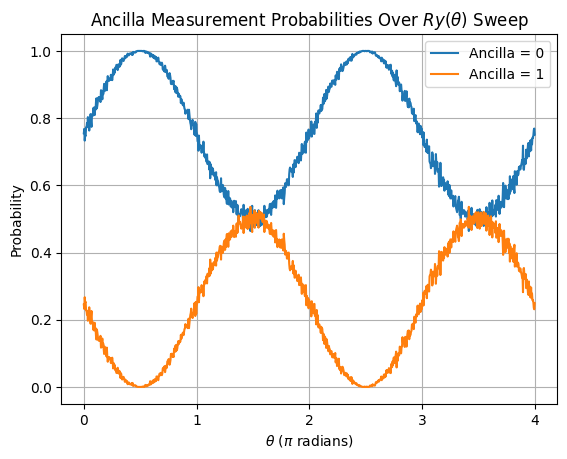

In [31]:
import cirq
import sympy
import numpy as np
import matplotlib.pyplot as plt

circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(4)
ancilla = cirq.LineQubit(4)

theta = sympy.Symbol("theta")

circuit.append([
    cirq.H(qubits[0]),
    cirq.ry(theta)(qubits[1]),
    cirq.H(qubits[2]),
    cirq.H(qubits[3]),
    cirq.H(ancilla),
    cirq.CSWAP(ancilla, qubits[0], qubits[2]),
    cirq.CSWAP(ancilla, qubits[1], qubits[3]),
    cirq.H(ancilla),
    cirq.measure(ancilla)
])

sim = cirq.Simulator()

thetas = cirq.Linspace(key="theta", start=0, stop=4*np.pi, length=1000)
thetq_values = np.linspace(0, 4*np.pi, 1000)

results_sweep = sim.run_sweep(circuit, repetitions=1_000, params=thetas)
results_0 = []
results_1 = []
for results in results_sweep:
    counts = results.data.iloc[:, 0].value_counts(normalize=True)
    results_0.append(counts.get(0, 0))
    results_1.append(counts.get(1, 0))

plt.plot(thetq_values / np.pi, results_0, label="Ancilla = 0")
plt.plot(thetq_values / np.pi, results_1, label="Ancilla = 1")
plt.xlabel("$\\theta$ ($\\pi$ radians)")
plt.ylabel("Probability")
plt.xticks(range(5), [f"{x}" for x in range(5)])
plt.legend()
plt.title("Ancilla Measurement Probabilities Over $Ry$($\\theta$) Sweep")
plt.grid(True)
plt.show()